In [1]:
import numpy as np
import pandas as pd
import btalib as ta
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
overall_index = pd.read_csv('overall index.csv')

In [3]:
overall_index.drop(columns='<TICKER>',inplace = True)

In [4]:
my_columns = {'<DTYYYYMMDD>':'Date','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low','<CLOSE>':'Close','<VOL>':'Vol'}
overall_index.rename(columns = my_columns,inplace = True )

In [5]:
def datetime_format(x):
    y= str(x)[:4]
    m= str(x)[4:6]
    d= str(x)[6:8]
    date = f'{y}-{m}-{d}'
    return date
overall_index['Date'] = overall_index['Date'].apply(lambda x: datetime_format(x))

In [6]:
overall_index.set_index(['Date'],inplace= True)

In [7]:
# change numbers to see different results
numA = 100
numB = 50

In [8]:
emaA = ta.ema(overall_index.Close, period=numA).df.rename(columns = {'ema':'emaA'})
emaB = ta.ema(overall_index.Close, period = numB).df.rename(columns = {'ema':'emaB'})

In [9]:
overall_index = pd.merge(overall_index, emaA,on = 'Date', how = 'left')
overall_index = pd.merge(overall_index, emaB, on = 'Date', how= 'left')

In [10]:
buy  = []
sell = []
trigger = 0
for row in range(overall_index.shape[0]):
    if overall_index['emaB'].iloc[row] > overall_index['emaA'].iloc[row] and trigger == 0 :
        buy.append(overall_index['Close'].iloc[row])
        sell.append(float("NaN"))

        trigger = 1
    elif overall_index['emaB'].iloc[row] < overall_index['emaA'].iloc[row] and trigger == 1 :
        buy.append(float("NaN"))
        sell.append(overall_index['Close'].iloc[row])
        trigger = 0
    else:
        sell.append(float('NaN'))
        buy.append(float('NaN'))

        
        

        
    
        
        
    

In [11]:
overall_index['buy'] = buy
overall_index['sell'] = sell

In [12]:
overall_index

,Open,High,Low,Close,Vol,emaA,emaB,buy,sell
Date,,,,,,,,,
2008-12-06,9248.8,9248.8,9167.8,9178.3,8539624,NaN,NaN,NaN,NaN
2008-12-07,9178.3,9178.3,9130.3,9130.5,11752353,NaN,NaN,NaN,NaN
2008-12-08,9102.7,9103.4,9079.6,9089.2,15299115,NaN,NaN,NaN,NaN
2008-12-10,9071.6,9071.6,9023.7,9023.7,15689653,NaN,NaN,NaN,NaN
2008-12-13,8973.3,8973.0,8973.0,8973.3,31428174,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-06-30,1249300.0,1256960.0,1248100.0,1256960.2,6152334613,1.216293e+06,1.188369e+06,NaN,NaN
2021-07-03,1258600.0,1258900.0,1246050.0,1246055.4,6308319007,1.216882e+06,1.190632e+06,NaN,NaN
2021-07-04,1242840.0,1244540.0,1237550.0,1243751.9,5329408022,1.217414e+06,1.192715e+06,NaN,NaN


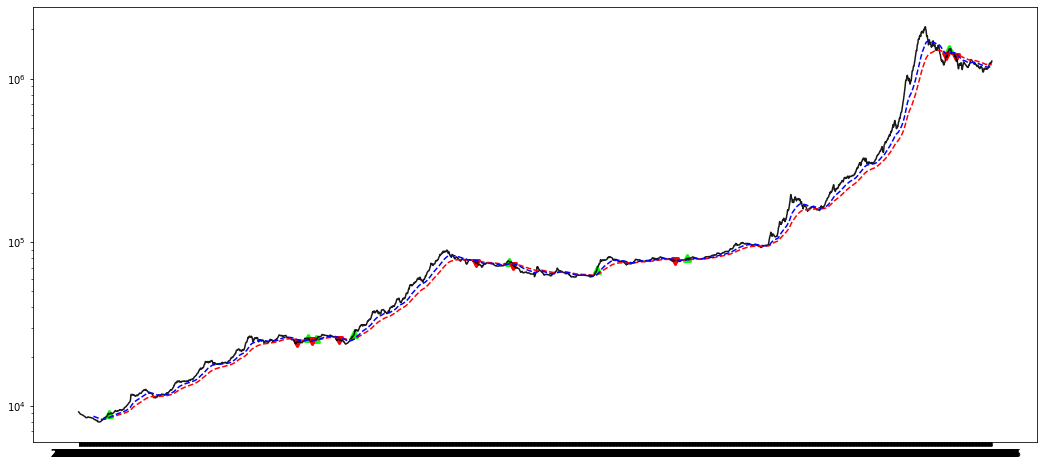

In [13]:
plt.figure(figsize=(18,8))
plt.plot(overall_index['Close'],label = 'overall index', alpha =0.9,color = 'black')
plt.plot(overall_index['emaA'],label = f'ema{numA}', color = 'red',linestyle= '--')
plt.plot(overall_index['emaB'], label = f'ema{numB}', color = 'blue',linestyle = '--')
plt.scatter(overall_index.index,overall_index['buy'], label= 'buy', marker = '^', color = '#00ff00',lw=3)
plt.scatter(overall_index.index,overall_index['sell'], label= 'sell', marker = 'v', color = '#ff0000', lw=3)
plt.yscale('log')
plt.show()

In [14]:
buy = overall_index['buy'][overall_index['buy'] > 0]
buy_date = buy.index.tolist()
buy_price = buy.tolist()

del buy

In [15]:
sell = overall_index['sell'][overall_index['sell'] > 0]
sell_date = sell.index.tolist()
sell_price = sell.tolist()
del sell

In [16]:
if len(buy_price) != len(sell_price):
    sell_date.append(overall_index.index[-1])
    sell_price.append(overall_index.Close[-1])

In [17]:
my_columns = ['buy_price','buy_date','sell_price','sell_date','return','duration']
Trades = pd.DataFrame( columns = my_columns)
Trades

,buy_price,buy_date,sell_price,sell_date,return,duration


In [18]:
for i in range(len(buy_price)):
    Trades = Trades.append(
                                        pd.Series([
                                                   buy_price[i],
                                                   buy_date[i],
                                                   sell_price[i],
                                                   sell_date[i],
                                                   (sell_price[i]-buy_price[i])/buy_price[i] ,
            (dt.datetime.strptime(sell_date[i], '%Y-%m-%d') - dt.datetime.strptime(buy_date[i], '%Y-%m-%d')).days
                                        ], 
                                                  index = my_columns), 
                                        ignore_index = True)

In [19]:
Trades

,buy_price,buy_date,sell_price,sell_date,return,duration
0,8932.1,2009-05-13,24356.9,2011-12-04,1.726895,935
1,25913.8,2012-01-31,24923.2,2012-02-20,-0.038227,20
2,25457.6,2012-03-10,25307.5,2012-07-10,-0.005896,122
3,27440.1,2012-09-25,74543.4,2014-06-01,1.716586,614
4,75930.8,2014-11-16,71860.2,2014-12-03,-0.053609,17
5,67740.1,2016-01-24,77189.7,2017-02-15,0.139498,388
6,79596.9,2017-04-26,1366536.2,2020-11-21,16.168209,1305
7,1523105.8,2020-12-06,1350211.4,2021-01-05,-0.113514,30


In [20]:
y = 1
for x in Trades['return']:
    y = y*(1+x)
overall_return = (y-1) * 100

In [21]:
print(f'overall return in this backtest is {overall_return} %')

overall return in this backtest is 11524.574959188198 %
